In [1]:
!python3 -m pip install autogluon

  Using cached autogluon-0.0.13-py3-none-any.whl (572 kB)
  Using cached catboost-0.23.2-cp36-none-manylinux1_x86_64.whl (64.8 MB)
  Using cached pyarrow-1.0.0-cp36-cp36m-manylinux2014_x86_64.whl (17.2 MB)
Processing /home/ec2-user/.cache/pip/wheels/70/71/a2/00ca7cb0f71294d73e8791d6fe5cd0c7401066ec3b7e1026db/ConfigSpace-0.4.10-cp36-cp36m-linux_x86_64.whl
  Using cached Pillow-6.2.1-cp36-cp36m-manylinux1_x86_64.whl (2.1 MB)
  Using cached scikit_learn-0.22.2.post1-cp36-cp36m-manylinux1_x86_64.whl (7.1 MB)
  Using cached lightgbm-2.3.1-py2.py3-none-manylinux1_x86_64.whl (1.2 MB)
  Using cached autogluon_contrib_nlp-0.0.1b20200815-py3-none-any.whl (147 kB)
  Using cached scikit_optimize-0.8.1-py2.py3-none-any.whl (101 kB)
  Using cached gluoncv-0.8.0-py2.py3-none-any.whl (810 kB)
Processing /home/ec2-user/.cache/pip/wheels/45/83/27/a45cc845ff2497e34bfc17403e649249e5e717adb08698903d/openml-0.10.2-py3-none-any.whl
Processing /home/ec2-user/.cache/pip/wheels/8a/c2/8c/3b80e2a78a9932c93ac3fd0c

Processing /home/ec2-user/.cache/pip/wheels/49/25/98/cdea9c79b2d9a22ccc59540b1784b67f06b633378e97f58da2/sacremoses-0.0.43-py3-none-any.whl
  Using cached sentencepiece-0.1.91-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached sacrebleu-1.4.14-py3-none-any.whl (64 kB)
  Using cached pyaml-20.4.0-py2.py3-none-any.whl (17 kB)
  Using cached portalocker-2.0.0-py2.py3-none-any.whl (11 kB)
Processing /home/ec2-user/.cache/pip/wheels/53/ba/da/8562a6a6dbb428fd1ecc21053106df3948645cd991958f669b/liac_arff-2.5.0-py3-none-any.whl
  Using cached xmltodict-0.12.0-py2.py3-none-any.whl (9.2 kB)
Processing /home/ec2-user/.cache/pip/wheels/e0/38/fc/472fe18756b177b42096961f8bd3ff2dc5c5620ac399fce52d/thrift-0.13.0-cp36-cp36m-linux_x86_64.whl
  Using cached immutables-0.14-cp36-cp36m-manylinux1_x86_64.whl (98 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: Pillow
    Fou

In [5]:
!nvidia-smi
!pip uninstall mxnet -y 
!pip install mxnet-cu102

Thu Sep 24 03:40:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 450.51.05    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:1E.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import autogluon as ag

filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
ag.unzip(filename)


'data'

In [3]:
from autogluon import ImageClassification as task

dataset = task.Dataset('data/train')

# test_dataset = task.Dataset('data/test', train=False)


scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.16.174.36/18634/1' processes=1 threads=4, memory=64.38 GB>, Resource: NodeResourceManager(4 CPUs, 1 GPUs))
})



Saving Training Curve in checkpoint/plot_training_curves.png


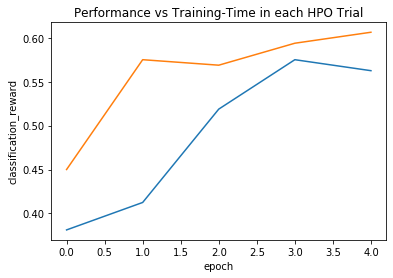

In [4]:
classifier = task.fit(dataset,
                      epochs=5,
                      ngpus_per_trial=1,
                      verbose=False)

In [5]:
print('Top-1 val acc: %.3f' % classifier.results['best_reward'])


Top-1 val acc: 0.606


In [11]:
image = 'data/test/BabyShirt/BabyShirt_323.jpg'
ind, prob, _ = classifier.predict(image)


print('The input picture is classified as [%s], with probability %.2f.' %
      (dataset.init().classes[ind.asscalar()], prob.asscalar()))


# print('The input picture is classified as [%s], with probability %.2f.' %
#       (dataset.init().classes[ind]))


The input picture is classified as [BabyShirt], with probability 0.49.


In [12]:
!pip install torch 
!pip install torchvision

     |████████████████████████████████| 748.8 MB 4.3 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 5.9 MB 10.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm

In [14]:
transform = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
])

# the datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [15]:
def train_mnist(args, reporter):
    # get variables from args
    lr = args.lr
    wd = args.wd
    epochs = args.epochs
    net = args.net
    print('lr: {}, wd: {}'.format(lr, wd))

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # Model
    net = net.to(device)

    if device == 'cuda':
        net = nn.DataParallel(net)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=args.lr, momentum=0.9, weight_decay=wd)

    # datasets and dataloaders
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

    # Training
    def train(epoch):
        net.train()
        train_loss, correct, total = 0, 0, 0
        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    def test(epoch):
        net.eval()
        test_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(testloader):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, targets)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        acc = 100.*correct/total
        # 'epoch' reports the number of epochs done
        reporter(epoch=epoch+1, accuracy=acc)

    for epoch in tqdm(range(0, epochs)):
        train(epoch)
        test(epoch)

In [16]:
import autogluon as ag

@ag.obj(
    hidden_conv=ag.space.Int(6, 12),
    hidden_fc=ag.space.Categorical(80, 120, 160),
)
class Net(nn.Module):
    def __init__(self, hidden_conv, hidden_fc):
        super().__init__()
        self.conv1 = nn.Conv2d(1, hidden_conv, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(hidden_conv, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, hidden_fc)
        self.fc2 = nn.Linear(hidden_fc, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [17]:
@ag.args(
    lr = ag.space.Real(0.01, 0.2, log=True),
    wd = ag.space.Real(1e-4, 5e-4, log=True),
    net = Net(),
    epochs=5,
)
def ag_train_mnist(args, reporter):
    return train_mnist(args, reporter)

In [18]:
myscheduler = ag.scheduler.FIFOScheduler(
    ag_train_mnist,
    resource={'num_cpus': 4, 'num_gpus': 1},
    num_trials=2,
    time_attr='epoch',
    reward_attr='accuracy')
print(myscheduler)

scheduler_options: Key 'searcher': Imputing default value random
scheduler_options: Key 'resume': Imputing default value False
scheduler_options: Key 'visualizer': Imputing default value none
scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True



FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.16.174.36/18634/1' processes=1 threads=4, memory=64.38 GB>, Resource: NodeResourceManager(4 CPUs, 1 GPUs))
})



In [19]:
myscheduler.run()
myscheduler.join_jobs()


Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


lr: 0.0447213595, wd: 0.0002236068




lr: 0.028245913732173278, wd: 0.00017160776862349322


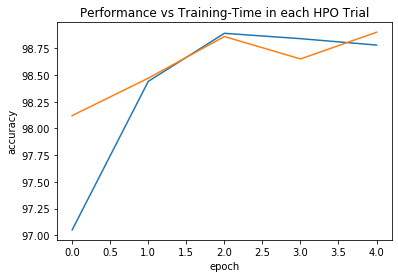

The Best Configuration and Accuracy are: {'lr': 0.028245913732173278, 'net▁hidden_conv': 11, 'net▁hidden_fc▁choice': 0, 'wd': 0.00017160776862349322}, 98.9


In [20]:
myscheduler.get_training_curves(plot=True,use_legend=False)
print('The Best Configuration and Accuracy are: {}, {}'.format(myscheduler.get_best_config(),
                                                               myscheduler.get_best_reward()))


# So, how about unsupervised learning ? 